<div style="text-align: center">
    <img src="https://github.com/user-attachments/assets/67c0d725-e0fc-4f32-88ed-5b485f5c960c" alt="YouTube Logo"/>
</div>

<div style="text-align: center">
    <h1>YouTube Trending Videos Data Analysis Using Python</h1>
</div>

## Problem Statement:

This project extract, analyze and visualize top 200 real-time trending videos on YouTube. Creating this data analysis involves several steps - data extraction, cleaning, exploratory data analysis (EDA) and visualizing the findings to get meaningful insights.

**Note that due to the dynamic nature of the real-time data extracted for this analysis, the insights and conclusions may differ from time to time.**

The script `get_trending_videos.py` fetches the top 200 real-time YouTube trending videos and saves them to a CSV file named `trending_videos.csv`.

The analysis caried out this project includes:
- Data loading and cleaning
- Exploratory Data Analysis (EDA)
- Visualizations

## Requirements

- Python 3.x
- pandas
- numpy
- matplotlib
- seaborn
- google-api-python-client (which includes the googleapiclient.discovery)

## Step 1: Setting Up The Environment

1. **Get YouTube Data API Key**

   The data was collected using the YouTube Data API. To get an API key:

    - Go to [Google Cloud Console](https://console.cloud.google.com) and sign-in or create an account if you do not have one.
    
    - Click on the `Select a project` drop-down menu at the top-left, then click `NEW PROJECT`.
    
    - Enter a project name, leave the location as "No organization", then click `CREATE`.
    
    - In the Google Cloud Console, use the top-left Navigation menu to navigate to `APIs & Services` > `Library`.
    
    - Search for `YouTube Data API v3` and click on it.
    
    - Click `Enable`.
    
    - Navigate to `APIs & Services` > `Credentials`.
    
    - Click `+ CREATE CREDENTIALS` and select `API key`.
    
    - Copy the generated API key.

2. **Install google-api-python-client in quiet (-q) mode**

In [1]:
# install google-api-python-client
!pip install -q google-api-python-client

3. **Install Required Python Libraries**

Make sure you have the necessary Python libraries installed. You can install them using `pip` in quiet (-q) mode.

In [2]:
!pip install -q pandas numpy matplotlib seaborn google-api-python-client

## Step 2: Data Extraction
Create a script to collect or fetch the top 200 trending videos on YouTube. Here's a sample script to get started:

In [3]:
import pandas as pd
from googleapiclient.discovery import build

# Save the the copied API key to an API_KEY variable
API_KEY = 'paste_api_key_here'

def get_trending_videos(api_key, max_results=200):
    # build the YouTube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        # the region code for Nigeria is NG
        regionCode='NG',  
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


- The `YouTube Data API v3` has been successfuly used to fetch details of the top 200 trending videos in the US, iterating through the API’s paginated responses to collect video details such as video_id, title, description, published date, channel information, tags, duration, definition, captions, and various engagement metrics like views, likes, and comments.

- The script compiles this information into a list, converts it into a pandas DataFrame, and saves the data to a CSV file named `trending_videos.csv`, allowing us to analyze trends and patterns in the collected video data.

## Step 3: Data Analysis

**Loading the Data**

Now, let's analyze the data

In [4]:
import pandas as pd

trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  VDy5q8iKU4U  Shade Poly 2 - Yoruba Movie 2024 Drama Odun Ad...   
1  TXqurDW5HzI  Nationwide Protest: 'You Will Have to Carry Us...   
2  dlhCMa3ijlU  FULL SPEECH: President Tinubu Addresses Nigeri...   
3  iyrzYXDiEfw  LOVE CAMERA ACTION - Nigerian Movies 2024 Late...   
4  c7Uda1sTfJM  Peaceful Protest 🙏#realwarripikin #protest #Ni...   

                                         description          published_at  \
0  In this thrilling Yoruba movie, a university s...  2024-08-05T13:00:28Z   
1  Lawyer and Human Rights Activist, Deji Adeyanj...  2024-08-01T11:31:52Z   
2  President Bola Ahmed Tinubu has assured Nigeri...  2024-08-04T06:27:24Z   
3  If you are looking for Nigerian Movies 2024 La...  2024-08-03T14:00:08Z   
4                                                NaN  2024-08-01T13:00:35Z   

                 channel_id     channel_title  category_id  \
0  UC83tx3zGcvQ_rXzsZigTnEA          APATATV+         

In [5]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,VDy5q8iKU4U,Shade Poly 2 - Yoruba Movie 2024 Drama Odun Ad...,"In this thrilling Yoruba movie, a university s...",2024-08-05T13:00:28Z,UC83tx3zGcvQ_rXzsZigTnEA,APATATV+,24,"['latest yoruba movies 2023 new release', 'yor...",PT1H6M26S,hd,False,424361,7296,0,0,638
1,TXqurDW5HzI,Nationwide Protest: 'You Will Have to Carry Us...,"Lawyer and Human Rights Activist, Deji Adeyanj...",2024-08-01T11:31:52Z,UCyEJX-kSj0kOOCS7Qlq2G7g,Arise News,25,"['Arise', 'News']",PT36M7S,hd,False,565604,5352,0,0,1641
2,dlhCMa3ijlU,FULL SPEECH: President Tinubu Addresses Nigeri...,President Bola Ahmed Tinubu has assured Nigeri...,2024-08-04T06:27:24Z,UCgp4A6I8LCWrhUzn-5SbKvA,TVC News Nigeria,25,"['tvc', 'tvc news', 'tvc news nigeria', 'top n...",PT23M,hd,False,297209,3450,0,0,2295
3,iyrzYXDiEfw,LOVE CAMERA ACTION - Nigerian Movies 2024 Late...,If you are looking for Nigerian Movies 2024 La...,2024-08-03T14:00:08Z,UCbvdwZvZgdl-pPyomEmaEfg,Omoni Oboli TV,24,"['omoni oboli tv', 'omoni oboli', 'omoni oboli...",PT1H29M8S,hd,False,566758,13015,0,0,1133
4,c7Uda1sTfJM,Peaceful Protest 🙏#realwarripikin #protest #Ni...,NaN,2024-08-01T13:00:35Z,UC9gpj8Rwyd31Rgb5-euTq6g,Real Warri Pikin,24,[],PT25S,hd,False,304573,10290,0,0,215


In [6]:
for name in trending_videos['title']:
    print(name, end='\n\n')

Shade Poly 2 - Yoruba Movie 2024 Drama Odun Adekola, Arinola Odubela, Vicky Kolawole, Olaide Oyedeji

Nationwide Protest: 'You Will Have to Carry Us Inside the Stadium', Deji Adeyanju Replies FCT CP

FULL SPEECH: President Tinubu Addresses Nigerians, Promises Better Future

LOVE CAMERA ACTION - Nigerian Movies 2024 Latest Full Movies

Peaceful Protest 🙏#realwarripikin #protest #Nigeria

President Tinubu Addresses Nigerians Amid Protests

功夫少女瞬闪暴杀敌人！【城寨英雄】#武俠  #功夫 #动作

🤯️ Vini Jr. ✖️ Brahim 🤯

MID NIGHT PRAYER COMMANDING THE DAY. 05-08-2024

Shade Poly - Yoruba Movie 2024 Drama Odun Adekola,Arinola Odubela,Vicky Kolawole,Olaide Oyedeji,Sidi

Talesu - Yoruba Movie 2024 Drama Bimpe Adedimeji, Lateef Adedimeji, Aishat Lawal, Mr Macaroni, Ijebu

HIGHLIGHTS | REAL MADRID 1 vs 2 FC BARCELONA | USA TOUR 2024

THE GATE KEEPER - EDDIE WATSON, EMMANUELLA ILOBA 2024 LATEST NIGERIAN MOVIES

美味しい食べ物のASMR _ ASMR FOOD 🍜🍝🍜🥓🥢🍗#asmr #美味しい食べ物#食べ物#vlog

HIGHLIGHTS: Liverpool 3-0 Manchester United | Sell-ou

2. **Data Cleaning**

    Let’s have a quick look at the missing values and data types:

In [7]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id           0
 title              0
 description       24
 published_at       0
 channel_id         0
 channel_title      0
 category_id        0
 tags               0
 duration           0
 definition         0
 caption            0
 view_count         0
 like_count         0
 dislike_count      0
 favorite_count     0
 comment_count      0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

- There may be missing values depending on the retieved data.
- In case of any of missing values, you can fill them in any column, say `descriptions` column with "No description" by using:

  `trending_videos['description'].fillna('No description', inplace=True)`
- The data types seem appropriate for most columns, but we may need to convert the `published_at` column to a datetime format and `tags` might need further processing. Let’s fix these changes:

In [8]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        116 non-null    object
 1   title           116 non-null    object
 2   description     92 non-null     object
 3   published_at    116 non-null    object
 4   channel_id      116 non-null    object
 5   channel_title   116 non-null    object
 6   category_id     116 non-null    int64 
 7   tags            116 non-null    object
 8   duration        116 non-null    object
 9   definition      116 non-null    object
 10  caption         116 non-null    bool  
 11  view_count      116 non-null    int64 
 12  like_count      116 non-null    int64 
 13  dislike_count   116 non-null    int64 
 14  favorite_count  116 non-null    int64 
 15  comment_count   116 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 13.8+ KB


In [9]:
trending_videos['tags']

0      ['latest yoruba movies 2023 new release', 'yor...
1                                      ['Arise', 'News']
2      ['tvc', 'tvc news', 'tvc news nigeria', 'top n...
3      ['omoni oboli tv', 'omoni oboli', 'omoni oboli...
4                                                     []
                             ...                        
111    ['agt 2024', 'agt', "america's got talent", "a...
112                                                   []
113                                    ['Arise', 'News']
114    ['Fantasy Movies', 'Science Fiction Movies', '...
115    ['binance', 'bitcoin', 'bitcoin news', 'btc', ...
Name: tags, Length: 116, dtype: object

In [10]:
for tag in trending_videos['tags']:
    print(tag, end='\n\n')

['latest yoruba movies 2023 new release', 'yoruba movies 2023 new release', 'yoruba movies', 'new yoruba movies latest this week', 'yoruba movies 2023 new release this week', 'yorubahood', 'free movies', 'african movies', 'apatatvplus', 'ibakatv', 'yoruba 2023 latest movies', 'newly uploaded 2023 yoruba movies', 'latest yoruba movies 2023 today', 'yoruba movies 2023', 'shade poly yoruba movie', 'shade poly 2', 'shade poly 2 yoruba movie', 'shade poly 2 full movie', 'odunlade adekola', 'arinola odubela', 'laide oyedeji']

['Arise', 'News']

['tvc', 'tvc news', 'tvc news nigeria', 'top nigeria news', 'latest nigeria news', '9ja news']

['omoni oboli tv', 'omoni oboli', 'omoni oboli movies', 'nollywood', 'nollywood movies', 'nigerian movies', 'nigeria', 'new movie', 'free movies', 'full movie', 'nigerian movies 2024 latest full movies', 'nollywood movies 2024 latest full movies', 'new movies', 'movies', 'nollywood movies 2024', 'latest nigerian movies 2024 full movie', 'romantic movies', 

In [11]:
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

#### Descriptive statistics

In [12]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,1.160000e+02,1.160000e+02,116.0,116.000000
mean,1.670153e+07,5.896478e+05,0.0,6485.879310
std,3.487653e+07,1.551116e+06,0.0,35424.979813
min,7.163200e+04,0.000000e+00,0.0,0.000000
25%,5.620568e+05,9.853250e+03,0.0,603.500000
50%,2.379434e+06,7.957600e+04,0.0,1174.500000
75%,1.319707e+07,4.295485e+05,0.0,3542.750000
max,2.167240e+08,1.165277e+07,0.0,378422.000000


#### Now, let’s have a look at the distribution of views, likes and comments of all the videos in the data:

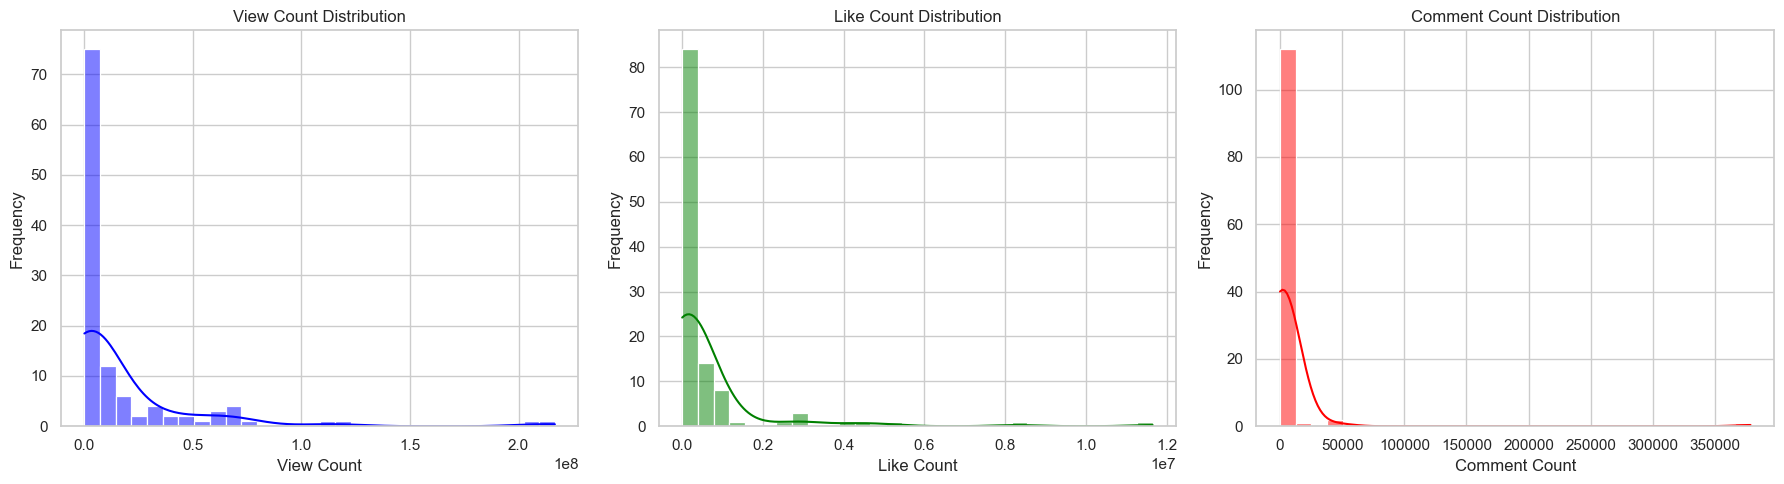

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Note that due to the dynamic nature of the real-time data extracted for this analysis, the insights and conclusions may differ occasionally.**

The histograms show that the distributions of view counts, like counts, and comment counts are right-skewed, with most videos having lower counts and a few videos having very high counts. Now, let’s have a look at the correlation between likes, views, and comments:

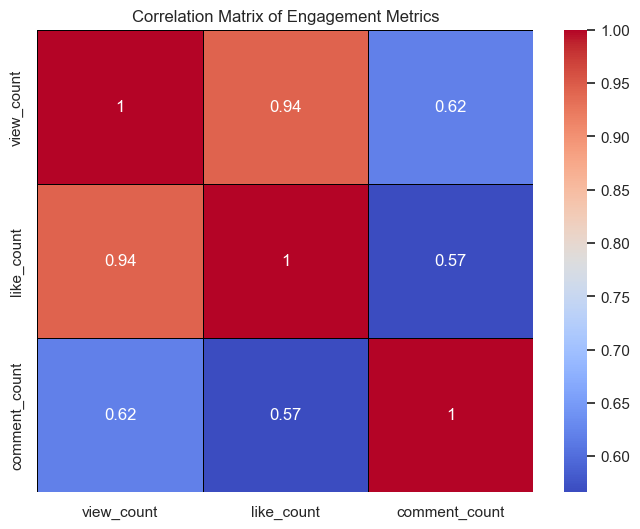

In [14]:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

**IMPORTANT: Note that due to the dynamic nature of the real-time data extracted for this analysis, the insights and conclusions may differ occasionally.**

- The heatmap confirms strong positive correlations between views, likes, and comments.

- I noticed that I only collected the category ID of the video and not the category name.

- So, let’s collect the category names as well to analyze the categories of the trending videos:

In [15]:
from googleapiclient.discovery import build

# Paste your API_KEY here
API_KEY = 'paste_api_key_here'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='NG' # you can change the regionCode to any other country of interest
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


#### Here’s how we can analyze the number of trending videos by category:

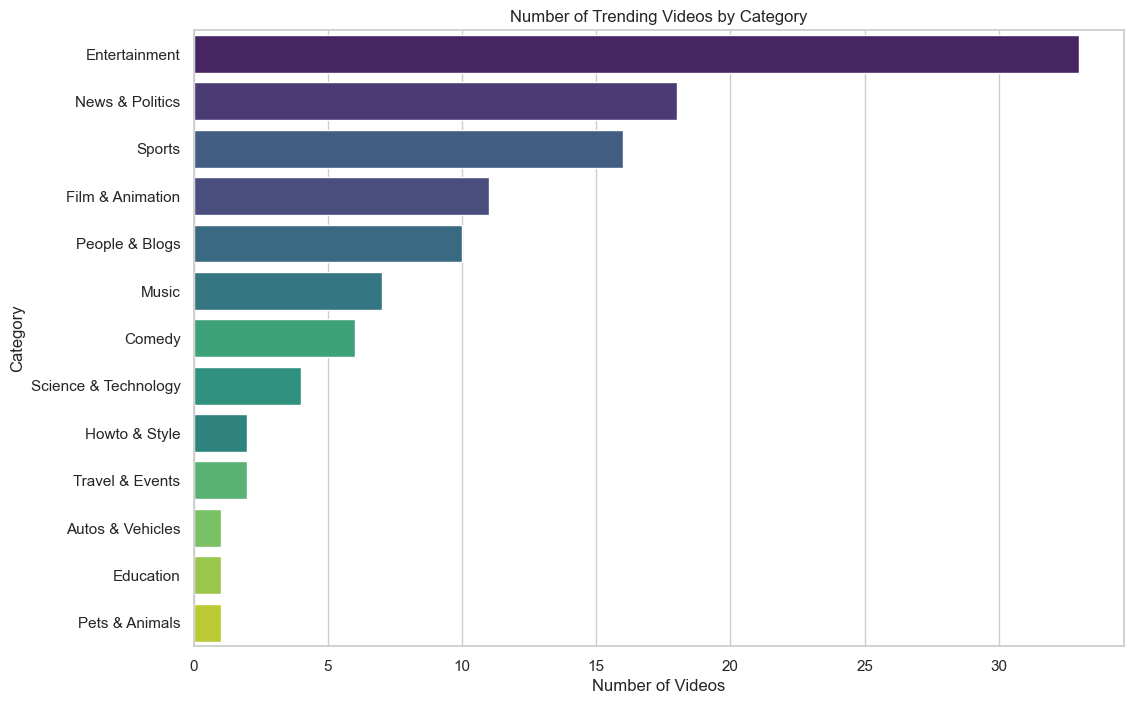

In [16]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis', hue=trending_videos['category_name'], legend=False)
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

**IMPORTANT: Note that due to the dynamic nature of the real-time data extracted for this analysis, the insights and conclusions may differ occasionally.**

- The bar chart shows that the Gaming, Entertainment, Sports, and Music categories have the highest number of trending videos.

#### Now, let’s have a look at the average engagement metrics by category:

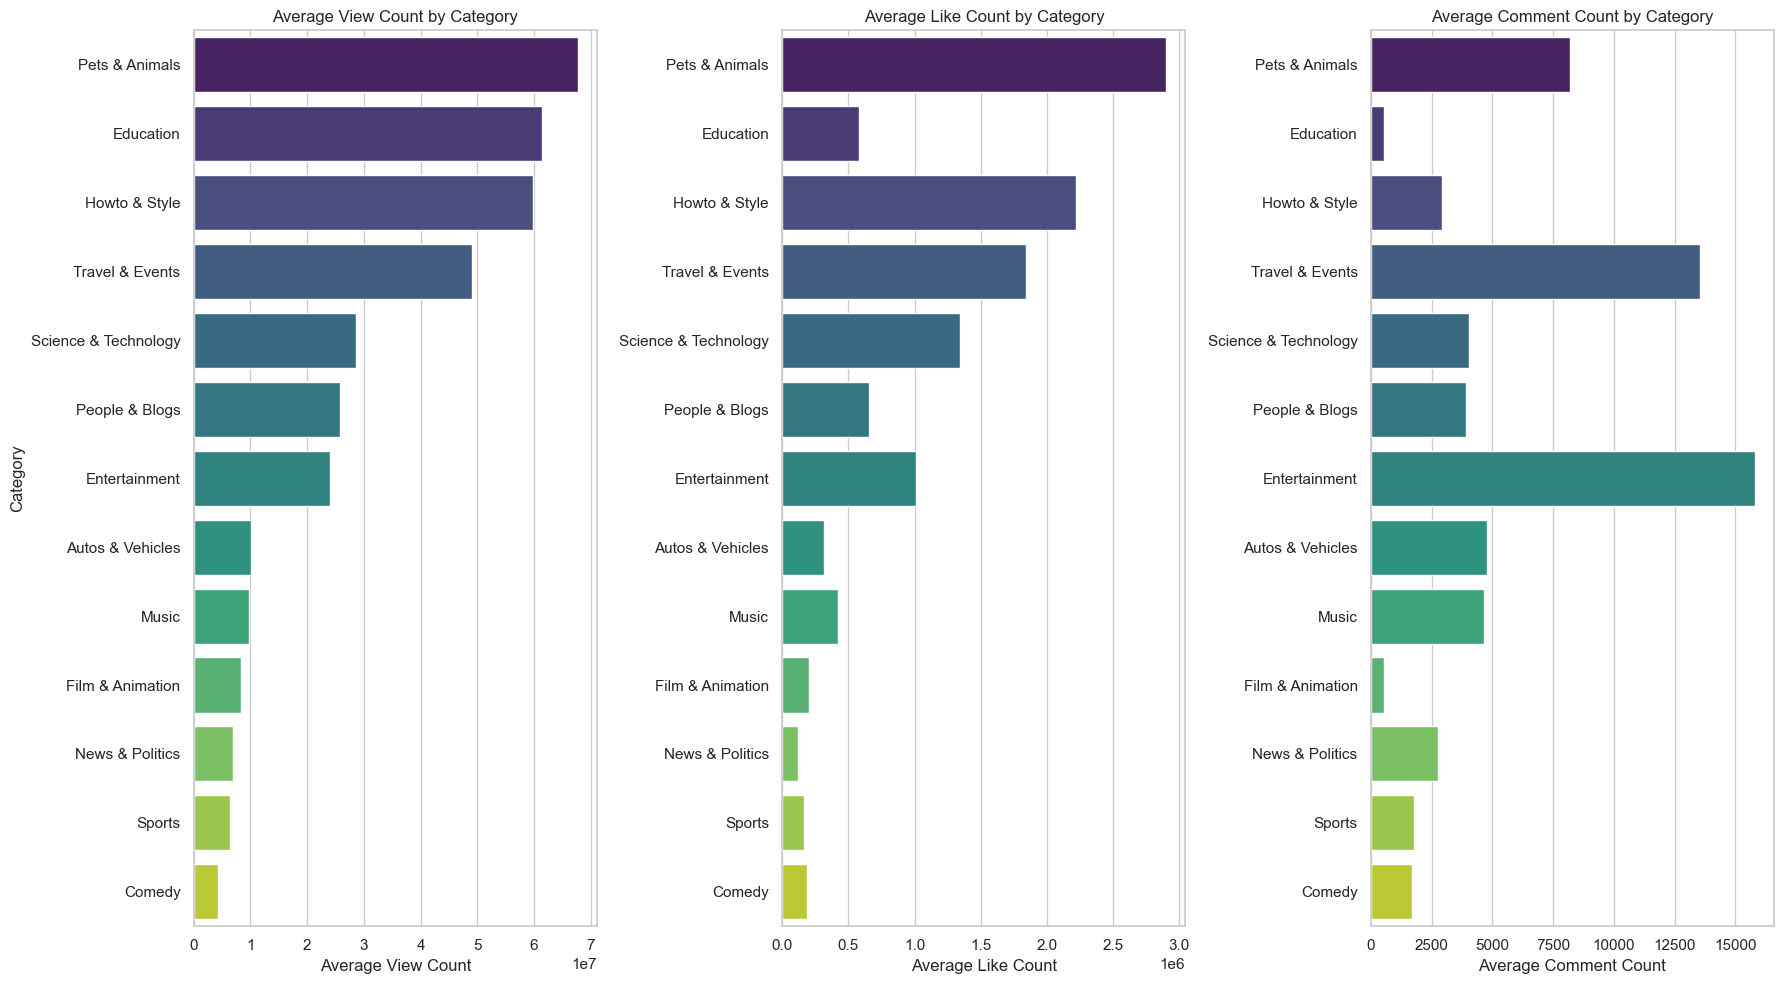

In [17]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis', hue=category_engagement.index, legend=False)
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis', hue=category_engagement.index, legend=False)
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis', hue=category_engagement.index, legend=False)
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

- Howto & Style categories have the highest average view counts and likes. Music also shows high engagement, especially in comment counts.

#### Let’s analyze the content and duration of the videos. But first, we need to convert the duration from ISO 8601 format to seconds:

In [18]:
# first install and import isodate library
!pip install -q isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

- In the above code, we are using the isodate library to convert the duration of each video from the ISO 8601 format to seconds, which allows for numerical analysis.

- After converting the durations, we are categorizing the videos into different duration ranges (0-5 minutes, 5-10 minutes, 10-20 minutes, 20-60 minutes, and 60-120 minutes) by creating a new column called duration_range.

- This categorization enables us to analyze and compare the engagement metrics of videos within specific length intervals, providing insights into how video length influences viewer behaviour and video performance.

### Now, let’s analyze the content and the duration of videos:

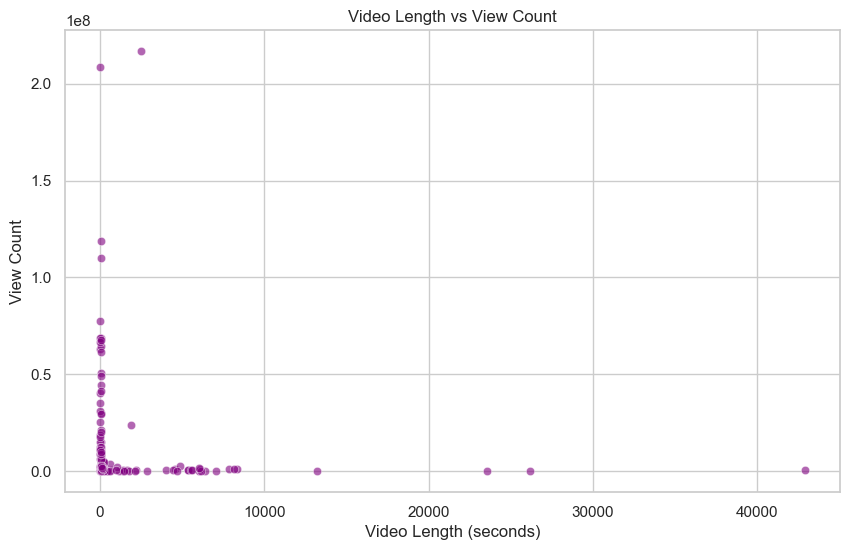

C:\Users\HP\AppData\Local\Temp\ipykernel_13804\1484390727.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()


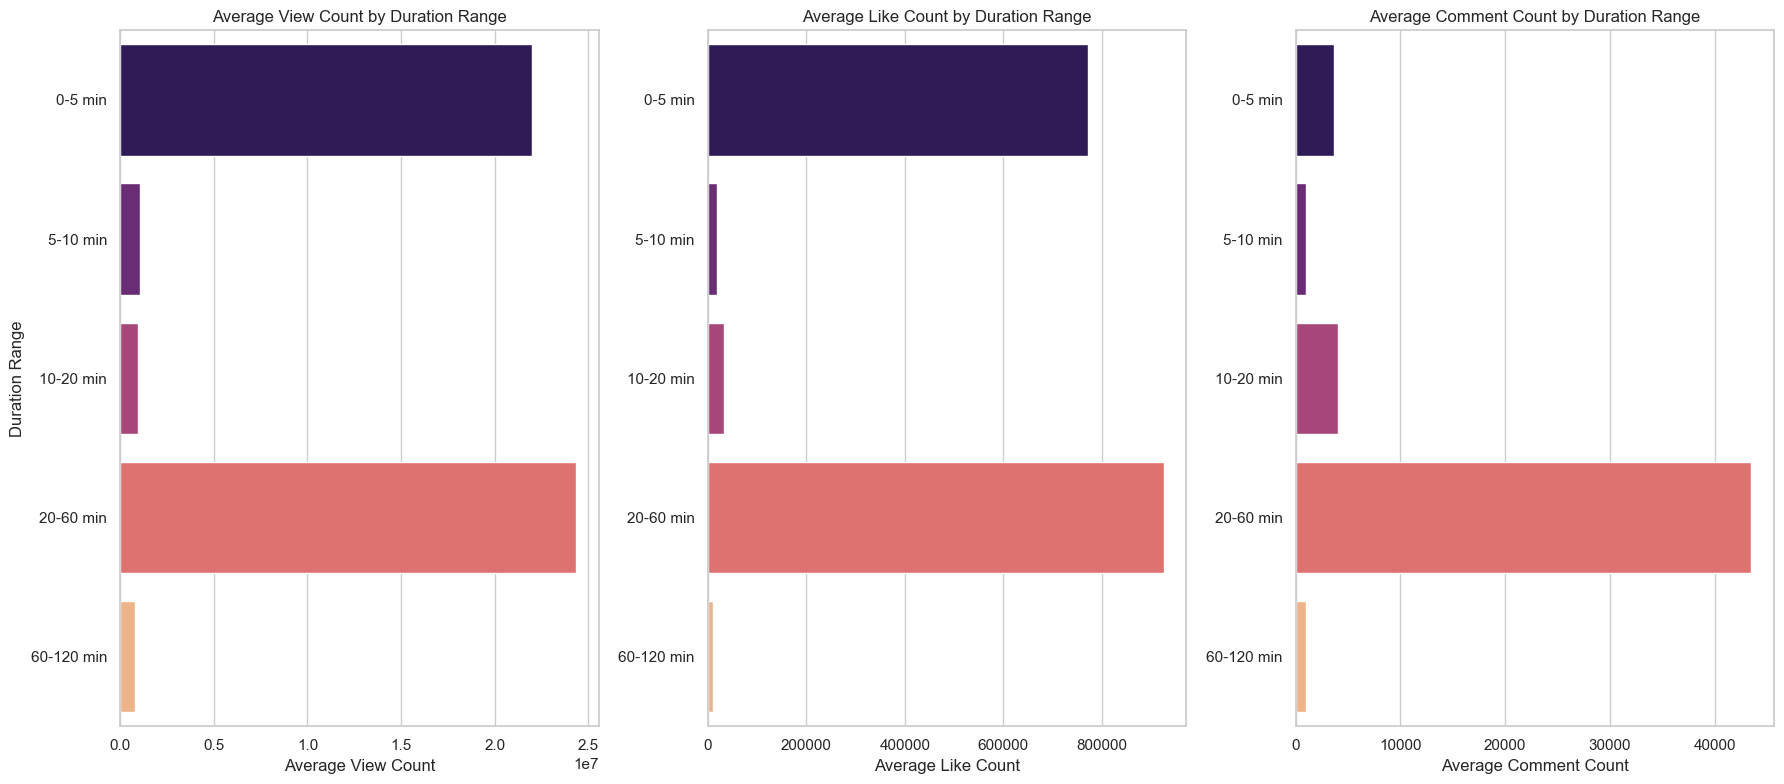

In [19]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma', hue=length_engagement.index, legend=False)
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma', hue=length_engagement.index, legend=False)
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma', hue=length_engagement.index, legend=False)
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

- The scatter plot shows a slight negative correlation between video length and view count, indicating shorter videos tend to have higher view counts. Videos in the 0-5 minute range have the highest average view counts, likes, and comments. Engagement decreases as video length increases.

#### Now, let’s analyze the relationship between views and number of tags used in the video:

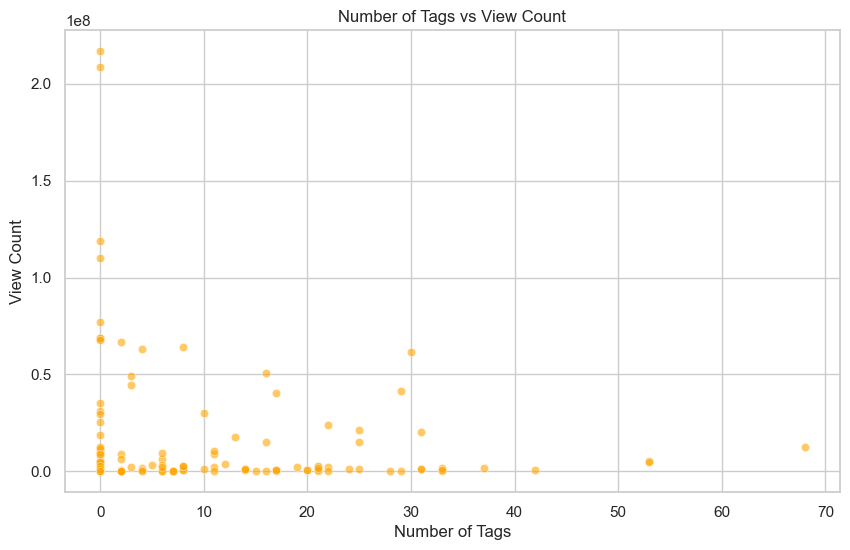

In [20]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

- The scatter plot shows a very weak relationship between the number of tags and view count, suggesting that the number of tags has minimal impact on a video’s view count.

#### Let’s see if there’s an impact of the time a video is posted on its views:

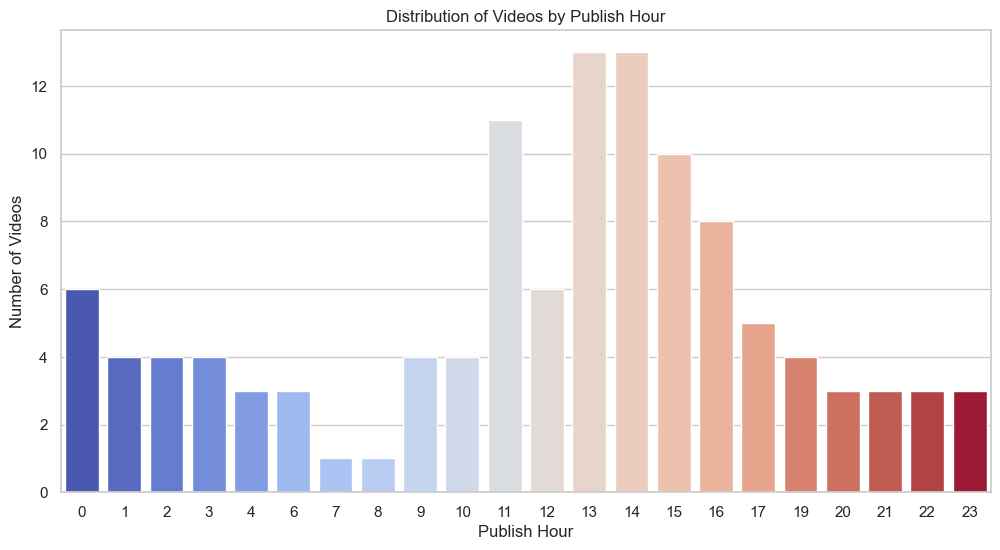

In [21]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm', hue='publish_hour', legend=False)
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

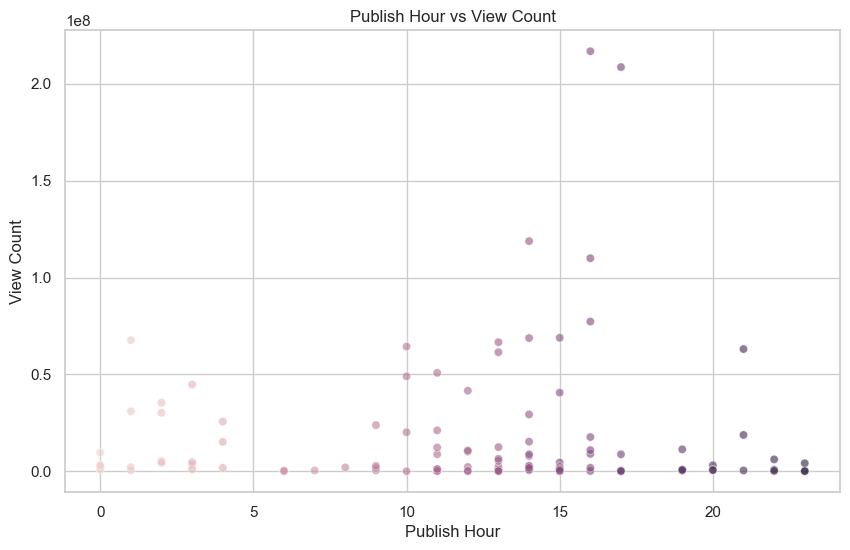

In [22]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal', hue='publish_hour', legend=False)
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

- The distribution shows that most videos are published between 14:00 and 20:00 hours (2 PM – 8 PM), indicating this may be an optimal time for uploading videos. There is a very weak negative relationship between publish hour and view count, suggesting that the hour of publication has minimal impact on engagement metrics.

# Step 4: Conclusions:

**IMPORTANT: Note that due to the dynamic nature of the real-time data extracted for this analysis, the insights and conclusions may differ from time to time.**

So, here is my conclusion on what makes a video trend on YouTube:

- Encourage viewers to **like and comment on videos to boost engagement metrics**.

- Aim to **create shorter videos (under 5 minutes) for higher engagement**, especially for categories like Music and Entertainment.

- Schedule **video uploads around peak times (2 PM to 8 PM)** to maximize initial views and engagement.

I hope you liked this project on YouTube Data Collection and Analysis using Python.

Feel free to connect with me on [Linkedin](https://www.linkedin.com/in/elijah-alabi-ng), and [X](https://www.x.com/elijah_alabi_ng)